In [ ]:
!pip install pydantic
!pip install yaml
!pip install networkx
!pip install matplotlib

In [1]:
from pydantic import BaseModel, root_validator
from typing import Dict, List
import networkx as nx

class LocationConfig(BaseModel):
    name: str
    description: str
    locations: Dict[str, 'LocationConfig'] = None
    connections: List[Dict[str, str]] = []
    
    @root_validator
    def check_connects_with(cls, values):
        if not values.get("locations") or not values.get("connections"):
            return values
        
        location_names = [name for name, _ in values.get("locations").items()]
        
        for connection in values.get("connections"):
            wrong_connection = [f"{f} <-> {t}" for f,t in connection.items() if f not in location_names or t not in location_names]
            
            if wrong_connection:
                raise ValueError(f"The connection <{wrong_connection}> does not exist in {location_names}")
        
        return values
    
class SimulationConfig(BaseModel):
    world: LocationConfig


In [2]:
import yaml
from pprint import pprint as pp

_config = []
config = []

with open("gen_agent/config.yaml", "rb") as file:
    _config = yaml.safe_load(file)
    config = SimulationConfig(**_config)
    
pp(config)

SimulationConfig(world=LocationConfig(name='Awesome World', description='It is all awesome here.', locations={'townhall': LocationConfig(name='Jims Townhall', description='The place to be ;)', locations=None, connections=[]), 'jims_cafe': LocationConfig(name='Jims Cafe', description='Cozy coffee', locations={'kitchen': LocationConfig(name='Kitchen', description='Place where the meal is prepared', locations={'fride': LocationConfig(name='Fridge', description="Let's the food stay cool", locations=None, connections=[]), 'oven': LocationConfig(name='Oven', description='Can cook some meal', locations=None, connections=[])}, connections=[]), 'living_room': LocationConfig(name='Living Room', description='Place where the Guests are relaxing', locations=None, connections=[]), 'entrance': LocationConfig(name='Entrance', description='Wait here until you will get your table', locations=None, connections=[]), 'restroom': LocationConfig(name='Restroom', description='Refresh yourself there', location

In [29]:
import networkx as nx
from typing import Dict, Tuple
import matplotlib.pyplot as plt

def resolve_locations(graph: nx.Graph, location: Tuple[str, LocationConfig], parent: str = ""):
    location_id, location_config = location
    
    location_id = f"{parent}_{location_id}" if parent else location_id
    
    print("PARENT", parent, "locationid", location_id)
    
    
    if parent:
        graph.add_edge(location_id, parent)
    
    for connection in location_config.connections:
        for from_, to_ in connection.items():
            graph.add_edge(f"{location_id}_{from_}", f"{location_id}_{to_}")
        
    if location_config.locations:
        
        new_graph = nx.Graph(location_id, _config=location_config)
        
        graph.add_node(new_graph, _config=location_config)
        graph.add_edge(parent, new_graph)
        
        for child_location in location_config.locations.items():
            resolve_locations(new_graph, child_location, location_id)
    


world_graph = nx.Graph(name=config.world.name, description=config.world.description)

for location in config.world.locations.items():
    resolve_locations(world_graph, location)
    
for connection in config.world.connections:
    for from_, to_ in connection.items():
        world_graph.add_edge(from_, to_)


nx.draw(world_graph, with_labels=True)
plt.show()

PARENT  locationid townhall
PARENT  locationid jims_cafe


NetworkXError: Input is not a valid edge list

In [25]:
config = {
    "general": {
      "global_time_limit": 24,
      "max_attempts": 2,
      "memory_limit": 10,
      "prompt_meta": "### Instruction:\n{}\n### Response:"
    },
    
    
    "town_areas": [
            "Phandalin Town Square": 
            "Town square of the town of Phandalin.",
          "Stonehill Inn": "In the center of town stands a large, newly built roadhouse of fieldstone and rough-hewn timbers. The common room is filled with locals nursing mugs of ale or cider, all of them eyeing you with curiosity.",
          "Barthen's Provisions": "Barthen’s is the biggest trading post in Phandalin. Its shelves stock most ordinary goods and supplies, including backpacks, bedrolls, rope, and rations. The place is open from sunup to sundown.",
      "Edermath Orchard": "A tidy little cottage beside an apple orchard."
    ],
    "town_people": {
        "Toblen Stonehill": {
          "description": "Owns a trading post.",
          "starting_location": "Stonehill Inn"
        },
        "Daran Edermath": {
          "description": "Daran Edermath is a retired adventurer who lives in a tidy little cottage beside an apple orchard. A fit, silver-haired half-elf well over a hundred years old, Daran is a fighter who served as a marshal and herald for many years in the lands of the Dragon Coast, far to the southeast. Upon retiring, he returned to the Neverwinter region, his original home.",
          "starting_location": "Edermath Orchard"
        },
        "Linene Graywind": {
          "description": "Runs a trading post.",
          "starting_location": "Barthen's Provisions"
        },
        "Halia Thornton": {
          "description": "An ambitious and calculating human woman. She is the guildmaster of Phandalin Miner’s Exchange, a trading post where local miners have their valuable finds weighed, measured, and paid out. In her attempts to establish the Miner's Exchange as the closest thing the town has to a governing authority, she acts as more than a simple merchant.",
          "starting_location": "Phandalin Town Square"
        }
      }
}

SyntaxError: invalid syntax (3285019724.py, line 11)

['yep', <networkx.classes.graph.Graph object at 0x117d6bcd0>]


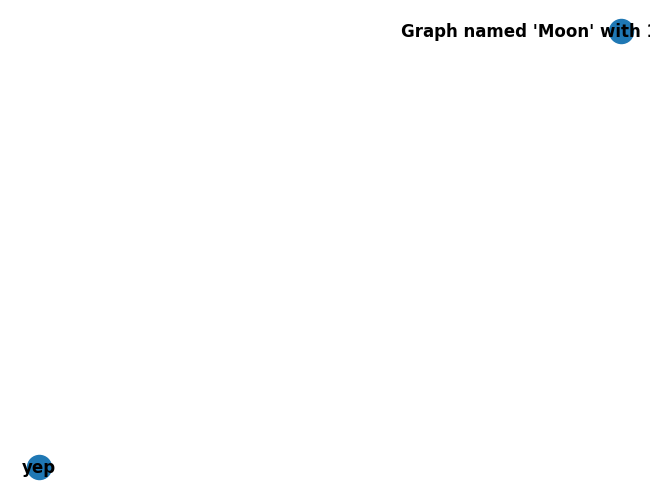

In [110]:
import matplotlib.pyplot as plt

g = nx.Graph(name="World", description="What an awesome..")
g.graph["description"]

x = ("yep", dict(xj="2312"))

g.add_node(x[0], **x[1])

h = nx.Graph(name="Moon", description="What an awesome 2 ..")

h.add_node("blubb")

g.add_node(h)

print(g.nodes)

nx.draw(g, with_labels=True, font_weight='bold')
plt.show()